In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
X = pd.read_csv("data_preNOx.csv")

In [3]:
y = X["NOx(GT)"]
X.drop(["NOx(GT)"], axis=1, inplace=True)

In [4]:
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
X_train.shape

(6686, 91)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81070.6562 - mean_absolute_error: 214.2133 - val_loss: 38067.0820 - val_mean_absolute_error: 138.6812
Epoch 2/150
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27698.3105 - mean_absolute_error: 118.9301 - val_loss: 14866.2734 - val_mean_absolute_error: 79.7507
Epoch 3/150
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12310.0439 - mean_absolute_error: 70.8106 - val_loss: 11425.0742 - val_mean_absolute_error: 66.6366
Epoch 4/150
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10530.7441 - mean_absolute_error: 63.6902 - val_loss: 10155.8135 - val_mean_absolute_error: 65.2021
Epoch 5/150
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9310.8545 - mean_absolute_error: 60.0515 - val_loss: 8695.3174 - val_mean_absolute_error: 57.8180
Epoch 6/150
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8717.3203 - mean_absolute_error: 57.6990 - val_loss: 8287.6504 - val_mean_absolute_error: 55.9514
Epoch 7/150
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [7]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

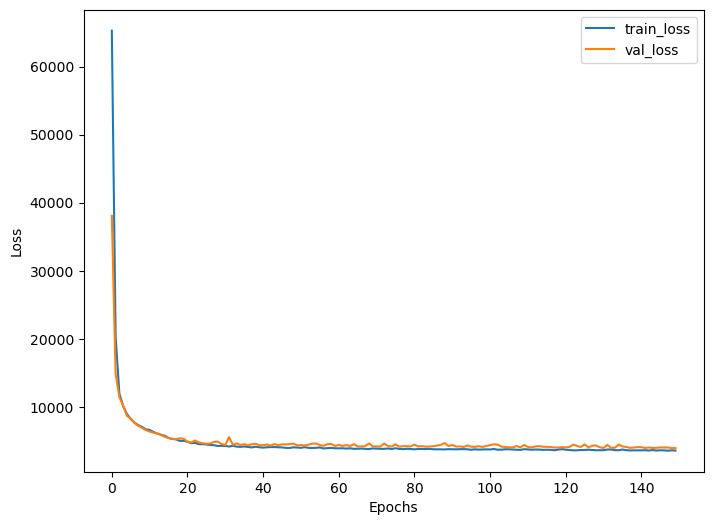

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


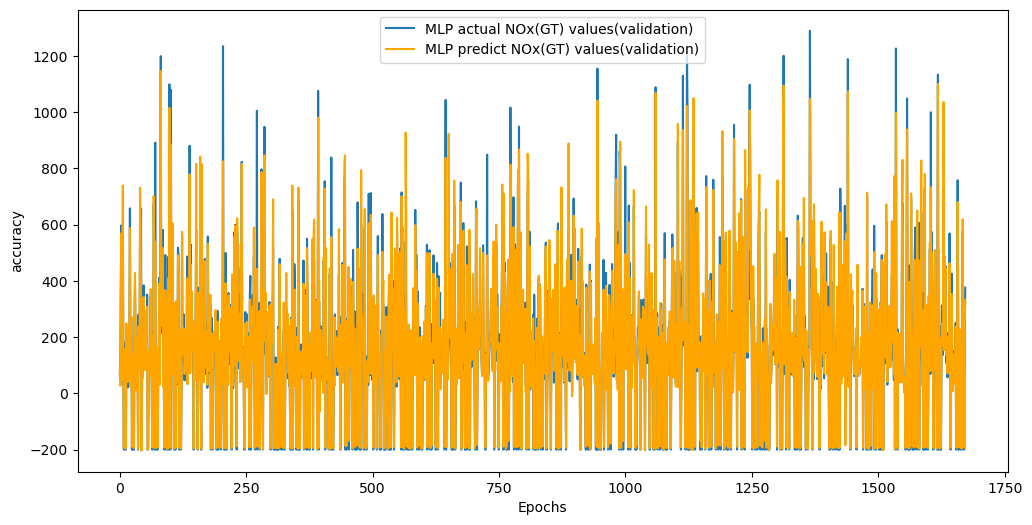

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(y_test), len(y_test)), y_test.values, label="MLP actual NOx(GT) values(validation)")
plt.plot(np.linspace(0, len(y_test), len(y_test)), model.predict(X_test), color="orange", label="MLP predict NOx(GT) values(validation)")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [40]:
RMSE = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
MAE = mean_absolute_error(y_test, model.predict(X_test))
RMSE, MAE, len(y_test)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


(63.02226476280194, 35.373445301877254, 1672)

In [41]:
model.save("poly_data_MLP.h5")
# model_para_yaml = model.to_yaml()
# with open("model_para.yaml", 'w') as f:
#     f.write(model_para_yaml)
# model.save_weights("model_weights.h5")


##### 经过对比发现，通过多项式变换创造了新的特征后，可以让模型更好的学习到数据之间的关系，有效的降低损失值

In [42]:
from tensorflow.keras.models import load_model

model_load = load_model("poly_data_MLP.h5")
model_load.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,515 (33.27 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor


def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

model = KerasRegressor(build_fn=create_model, optimizer='adam', activation='relu', epochs=50, batch_size=32, verbose=0)

para_dict = {
    "optimizer" : ['adam', 'rmsprop'],
    "activation" : ["relu", "tanh"],
    "epochs" : [50, 100, 150]
}

grid = GridSearchCV(estimator=model, param_grid=para_dict, n_jobs=-1, cv=5)


In [29]:
gird_res = grid.fit(X, y)
gird_res.best_params_

C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'activation': 'relu', 'epochs': 150, 'optimizer': 'adam'}

In [36]:
import joblib

joblib.dump(gird_res.best_estimator_, "best_model.pkl")
best_model = joblib.load('best_model.pkl')
